# Advanced visualizations

---

### Lecture objectives

- Understand which types of figures are suitable to create from raw data.
- Learn how to avoid common pitfalls when plotting large data sets.
- Learn about tidy data.
- Transform data from the long to wide format.

### Lecture outline

- Visualization tips and tricks
    - Choose informative plots for categorical data (35 min)
    - Making plots accessible through suitable color choices (10 min)
    - Avoiding saturated plots (40 min)
- Reshaping with data with `pivot()`, `pivot_table()`, and `melt()` (40 min)

---

## Example to exercise what we learned in the previous lecture: 

An interesting aspect to explore in this dataset is
how the relationship between per capita and total CO2 emissions
has changed over time for different income groups.
As we have seen before,
this can be explored in a line graph,
but if we instead subset certain years from the data and create a facet for each year,
we can see the spread at each point in time 

In [13]:
# let's import the required libraries and the data again:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

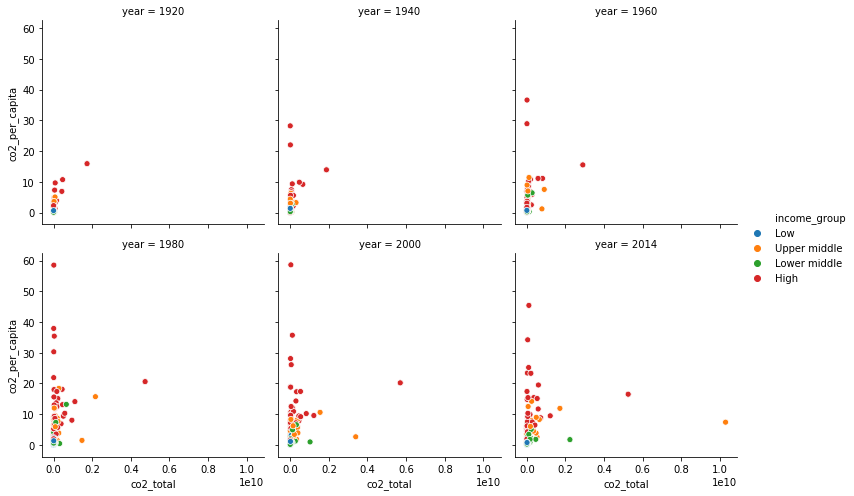

In [7]:
world_data['co2_total'] = world_data['co2_per_capita'] * world_data['population']

world_data_1920_2018 = world_data.loc[world_data['year'].isin([1920, 1940, 1960, 1980, 2000, 2014])]

sns.relplot(x='co2_total', y='co2_per_capita', col='year', hue='income_group',
            data=world_data_1920_2018, col_wrap=3, height=3.5);

## How to know which relationships to start exploring?

In the exercises above, we chose suitable variables to illustrate the plotting concepts. Often when doing EDA, it will not be as easy to know what comparison to start with. Unless you have good reason to look at a particular relationship, starting by plotting the pairwise relationships of all quantitative variables can be helpful.

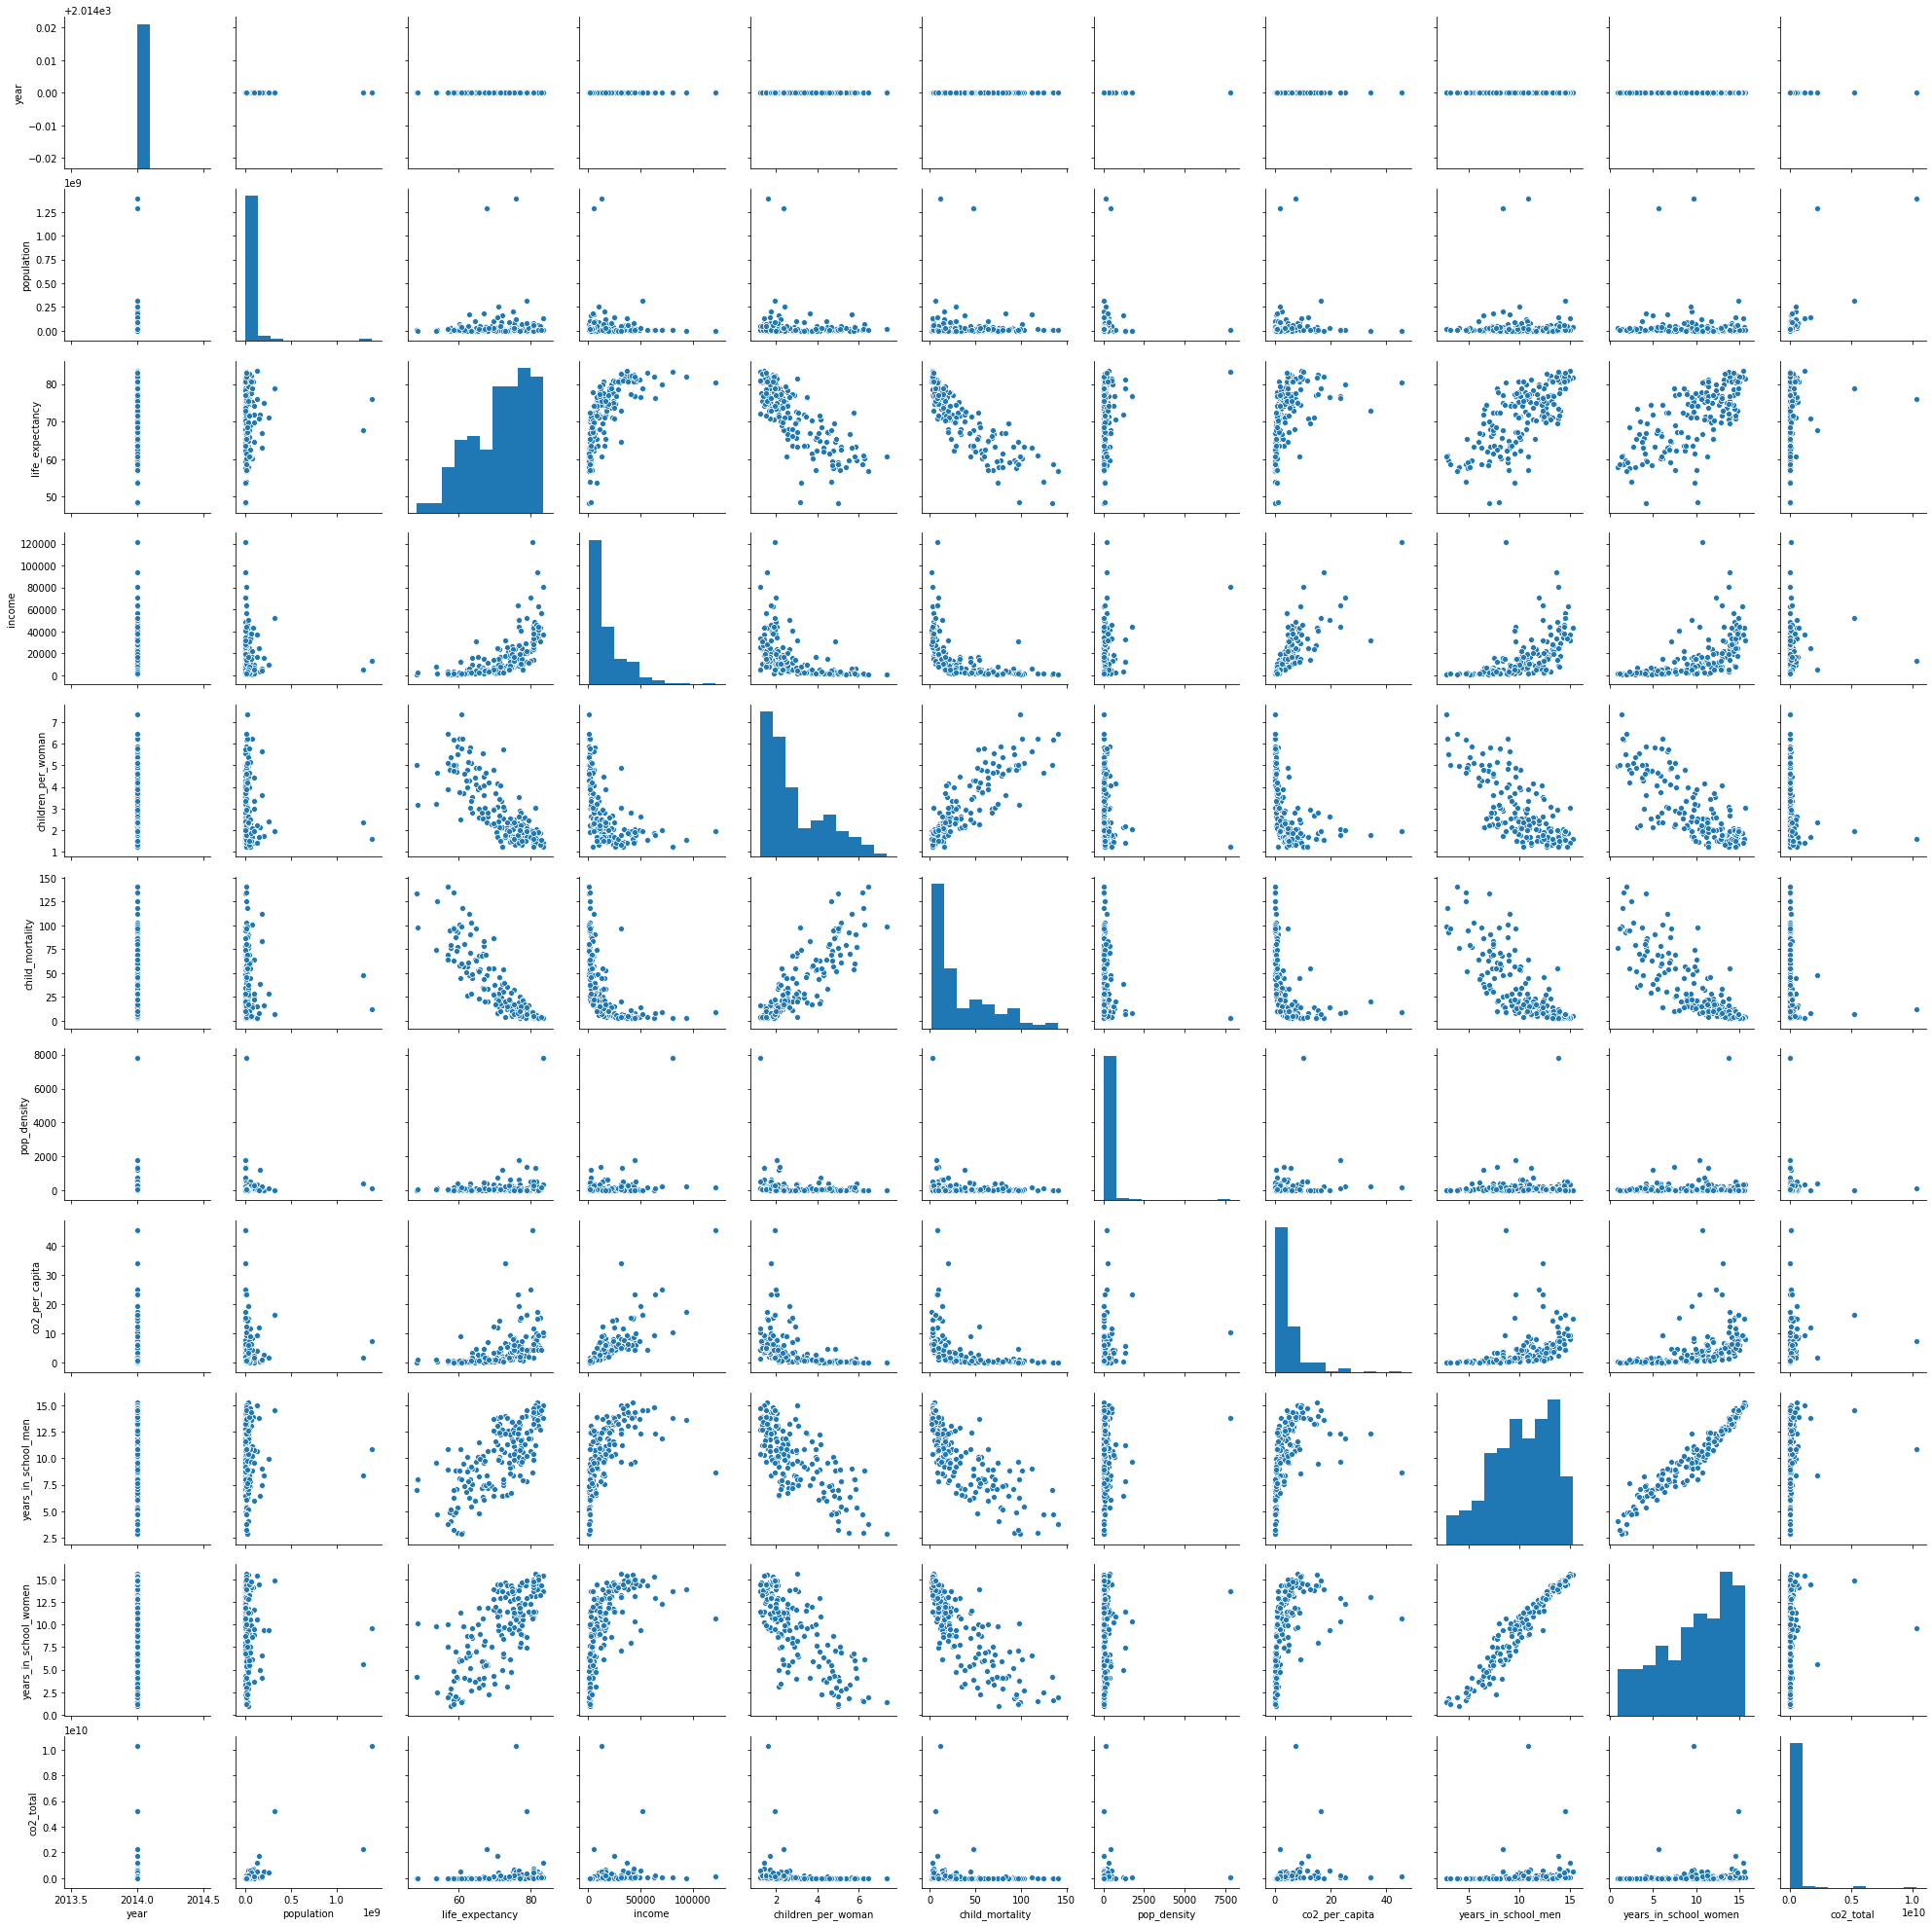

In [8]:
# Use 2014 data since we know that there are CO2 measurements in that year
# This might take some time
world_data_2014 = world_data.loc[world_data['year'] == 2014]

sns.pairplot(world_data_2014);

The year column is not that insightful since there is only one year in the data.
Removing that column gives more space for the rest of the plots.

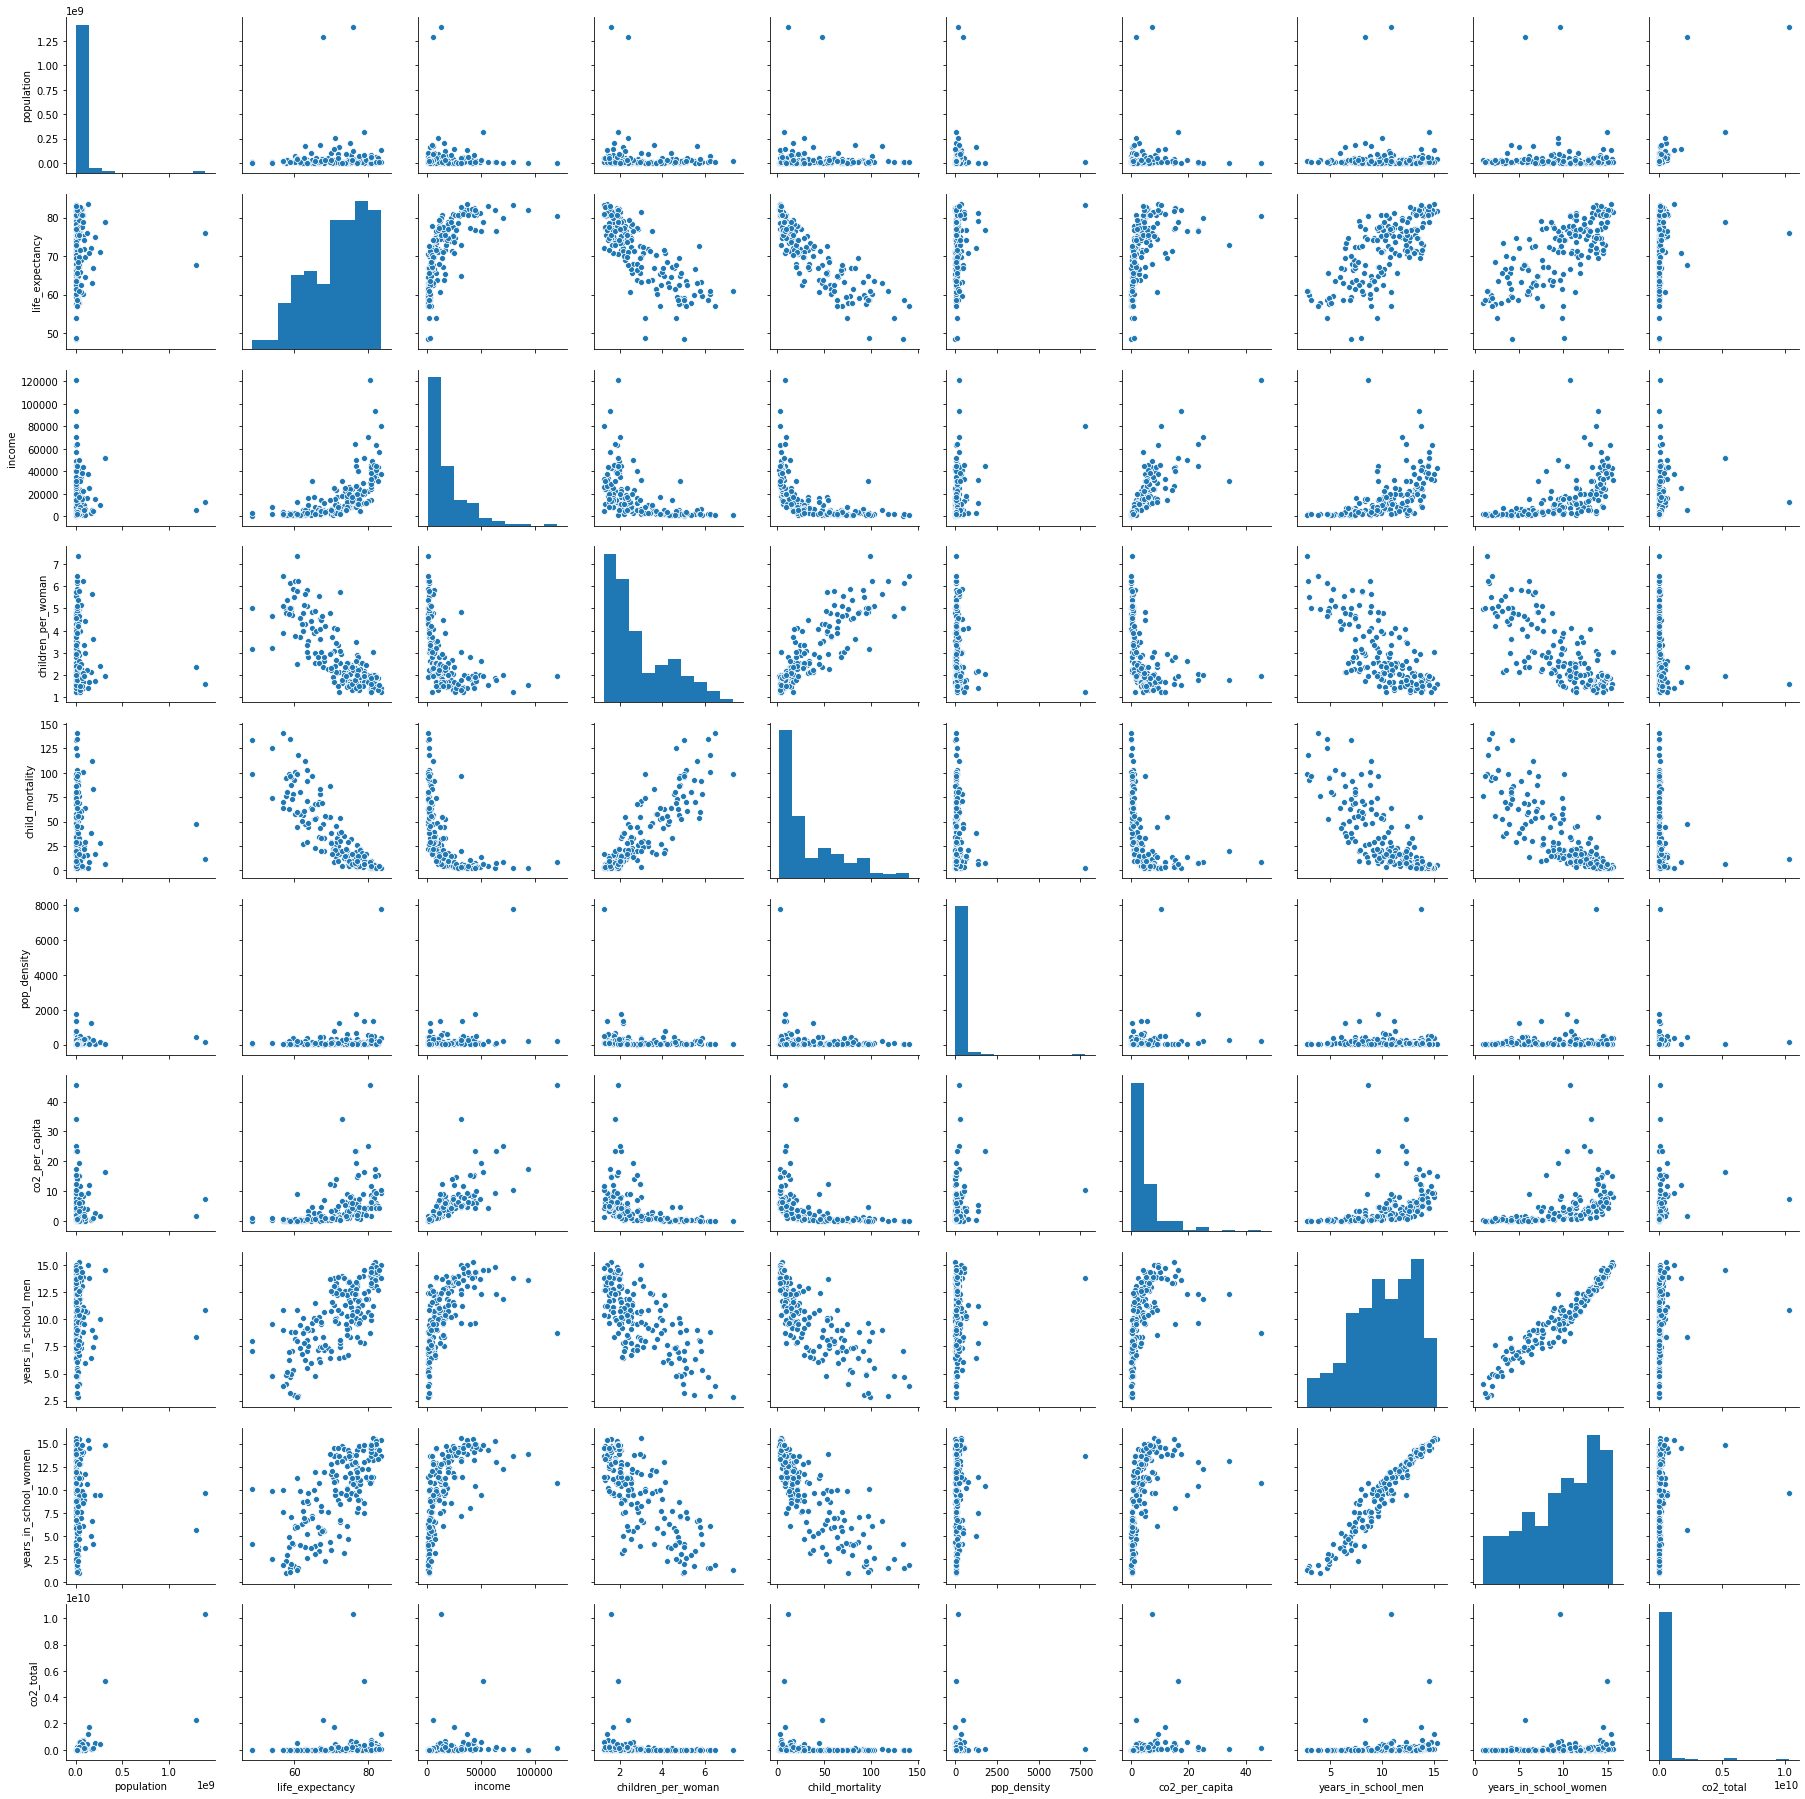

In [9]:
sns.pairplot(world_data_2014.drop(columns='year'));

Each histogram on the diagonal shows the distribution of a single variable in a histogram. The scatter plots below the diagonal show the relationship between two numerical variables in a scatter plot. The scatter plots above the diagonal are mirror images of those below the diagonal.

Plotting all pairwise relationships can provide clues for what to explore next. For example, the relationships we explored above between child mortality and children per women or those between total CO2 and CO2 per capita can also be seen here. It is possible to quantify the strength of these relationships, by computing the Pearson correlation coefficients between columns.

In [10]:
world_data_2014.drop(columns='year').corr()

,population,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,co2_total
population,1.000000,0.030287,-0.018722,-0.081238,-0.020972,0.007582,0.030332,0.002468,-0.041425,0.793742
life_expectancy,0.030287,1.000000,0.657802,-0.799828,-0.874888,0.175735,0.470473,0.728390,0.733867,0.134539
income,-0.018722,0.657802,1.000000,-0.531244,-0.552647,0.272004,0.811414,0.587577,0.587465,0.143298
children_per_woman,-0.081238,-0.799828,-0.531244,1.000000,0.876937,-0.142893,-0.432277,-0.752064,-0.784334,-0.155883
child_mortality,-0.020972,-0.874888,-0.552647,0.876937,1.000000,-0.124961,-0.445617,-0.789523,-0.818579,-0.135802
pop_density,0.007582,0.175735,0.272004,-0.142893,-0.124961,1.000000,0.116003,0.081713,0.077876,-0.017424
co2_per_capita,0.030332,0.470473,0.811414,-0.432277,-0.445617,0.116003,1.000000,0.450181,0.461199,0.202696
years_in_school_men,0.002468,0.728390,0.587577,-0.752064,-0.789523,0.081713,0.450181,1.000000,0.964938,0.153855
years_in_school_women,-0.041425,0.733867,0.587465,-0.784334,-0.818579,0.077876,0.461199,0.964938,1.000000,0.117718
co2_total,0.793742,0.134539,0.143298,-0.155883,-0.135802,-0.017424,0.202696,0.153855,0.117718,1.000000


With so much data, it is slow for us to process all the information as numbers in a table A higher bandwidth operation is to let our brain interpret colors for the strength of the relationships through a heatmap.

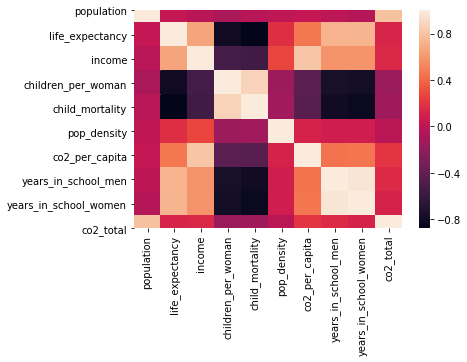

In [11]:
sns.heatmap(world_data_2014.drop(columns='year').corr())

The heatmap can be made more informative by changing to a diverging colormap,
which is generally recommended when there is a natural central value
(such as 0 in our case).
Optionally,
the heatmap can be annotated with the correlation coefficients.

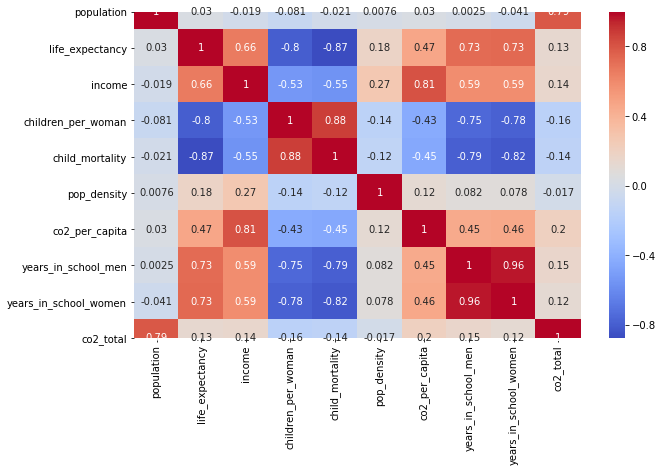

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(world_data_2014.drop(columns='year').corr(), annot=True, ax=ax, cmap='coolwarm');

There are more formal ways of interrogating variable interactions and their potential causality (such as regressions), but these are outside the scope of this lecture. However, the pairwise scatter plot and correlation coefficient matrix are quick means to get an informative overview of how the dataframe columns relate to each other.

Let's zoom in on the relationship between income and life expectancy, which appears to be quite strong.

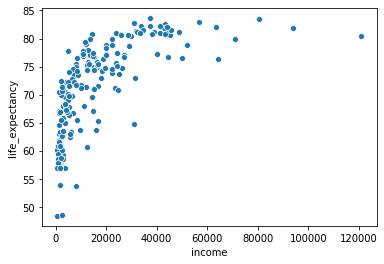

In [16]:
ax = sns.scatterplot(x='income', y='life_expectancy', data=world_data_2014)

This relationship appears to be log linear
and can be visualized with the x-axis set to log-scale.

> #### Challenge
>
> 1. Find out how to change the x-axis to be log-scaled.
     Search online for how to change the scale of a matplotlib axes object.
     Remember that seaborn plots return matplotlib axes objects,
     so all matplotlib function to modify the axes will work on this plot.
     Good sites to use are the documentation pages for the respective package,
     and stackoverflow.
     However,
     it is often the fastest to type in a well chosen query in your favorite search engine.
> 2. In the logged plot,
     color the dots according to the region of the observation.

Another interesting relationship we could see from the `pairplot`
is how child mortality relates to how many children are born per woman.
We can filter out years of the data
and look at how the relationship has changed over time
using the same approach as for the CO2 data.

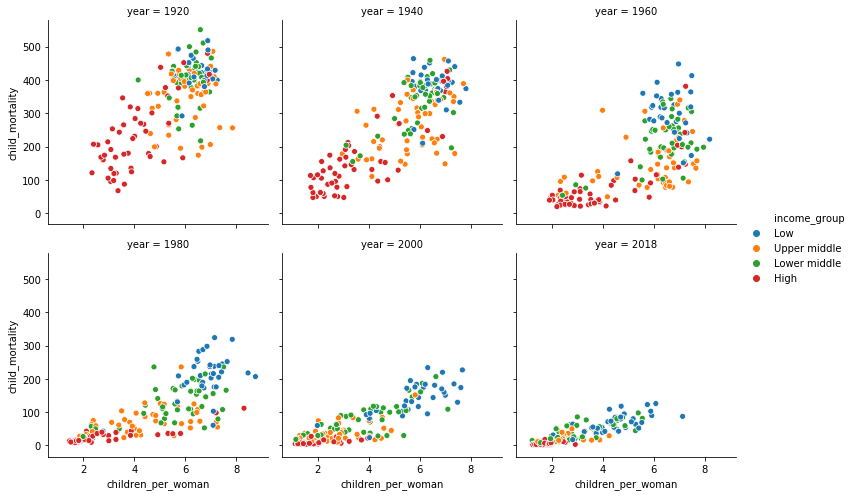

In [19]:
world_data_1920_2018 = world_data.loc[world_data['year'].isin([1920, 1940, 1960, 1980, 2000, 2018])]

sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income_group',
            data=world_data_1920_2018, col_wrap=3, height=3.5)

A common misconception is that saving poor children will lead to overpopulation. However, we can see that lower child mortality is correlated with smaller family sizes. As more children survive, parents feel more secure with a smaller family size. Reducing poverty is also related to these variables, since most high income countries are found in the lower left corner of the plots (remember that the income group is classified based on 2018 year's income and not for each year that is being plotted above).

It is important to note that from a plot like this, it is not possible to tell causation, just correlation. However, in the gapminder video library there are a few videos on this topic (including this and this one), discussing how reducing poverty can help slow down population growth through decreased family sizes. Current estimates suggest that the word population will stabilize around 11 billion people and the average number of children per woman will be close to two worldwide in year 2100.

### Exploring a single quantitative variable across multiple levels of a categorical variable

When exploring a single quantitative variable,
we can choose between plotting every data point
(e.g. categorical scatterplots such as swarm plots and strip plots),
an approximation of the distribution
(e.g. histograms and violinplots),
or distribution statistics such as measures of central tendency
(e.g. boxplots and barplots).

A good place to start is to visualize the variable's distribution with `distplot()`.
Let's look at life expectancy during 2018 using this technique.

In [ ]:
world_data_2018 = world_data.loc[world_data['year'] == 2018]
sns.distplot(world_data_2018['life_expectancy'])

The line represents a KDE
(kernel density estimate),
as seen previously in the grouped pairplot.
Conceptually, this is similar to a smoothened histogram.

`distplot()` can be customized to increase the number of bins
and the bandwidth of the kernel.
These are both calculated according to heuristics
for what should be good numbers for the underlying data,
but it is good to know how to change them.

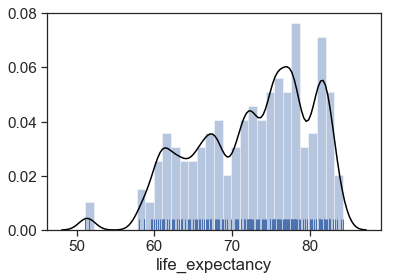

In [59]:
sns.distplot(world_data_2018['life_expectancy'], bins=30, rug=True,
             kde_kws={'bw':1, 'color':'black'})

The rug plot along the x-axis
shows exactly where each data point resides.
To compare distributions between values of a categorical variables,
violinplots are often used.
These consist of two KDEs mirrored across a midline.

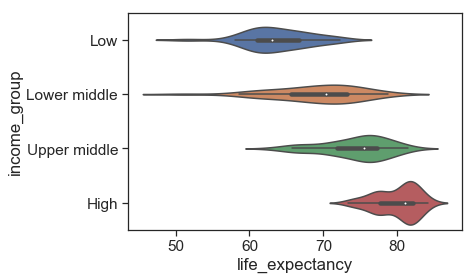

In [60]:
sns.violinplot(x='life_expectancy', y='income_group', data=world_data_2018)

Since `income_group` was defined as an ordered categorical variable previously,
this order is preserved when distributing the income groups along the y-axis.

There is notable variation in life expectancy between income groups,
people in wealthier countries live longer.
This variation contributes to the multimodality seen in the first distribution plot
of the life expectancy for all countries in the world.
However,
there is also large overlap between income groups and variation within the groups,
so there are more variables affecting the life expectancy than just the income.

Dissecting multimodal distributions in this manner
to find underlying explaining variables
to why a distribution appears to consist of many small distributions
is common practice during EDA.
It looks like some income groups,
e.g. "high",
still consist of multimodal distributions.
To explore these further,
facetting can be used just as previously.
The categorical equivalent of `relplot` is `catplot` (categorical plot).

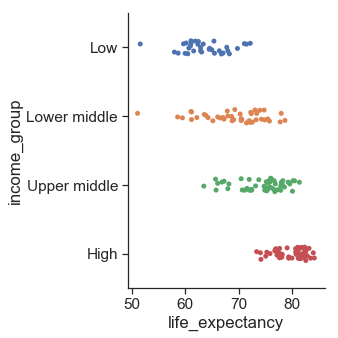

In [61]:
sns.catplot(x='life_expectancy', y='income_group', data=world_data_2018)

The default in `catplot` is to create a `stripplot`,
a categorical scatterplot where the dots are randomly jittered to not overlap.
This is fast to create,
but it is sometimes hard to see how many dots are in a group due to overlap.
A more ordered approach is to create another type of categorical scatterplot,
called swarmplot,
where the dots are positioned to avoid overlap.

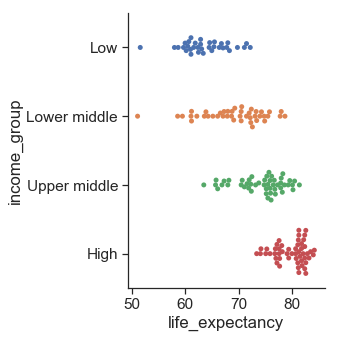

In [62]:
sns.catplot(x='life_expectancy', y='income_group', data=world_data_2018, kind='swarm')

The swarm plot communicates the shape of the distribution more clearly than the stripplot,
Here, we can see the same bimodality in the high income group as seen in the violinplot,
which was hard to see in the stripplot.

A drawback is that swarmplots can be slow to create for large datasets.
For really large datasets,
even stripplot is slow and it is necessary to approximate the distributions
(e.g. with a violinplot)
or show distribution statistics
(e.g. with a boxplot),
instead of showing each observation .

We can use color to find out if regional differences are related to income level.

In [ ]:
# TODO Will update this to look prettier
sns.catplot(x='life_expectancy', y='region', data=world_data_2014, kind='box',
            col='income_group', col_wrap=2)

The variable levels are automatically ordered
and it is easy to see how life expectancy generally grow with higher average income.
In contrast to a line plot with the average change over time,
we can here see how the distribution itself changes,
not just the average.
While countries in general have increased their life expectancy,
differences can be seen in how they have done it:
Europe and the Americas have gone from a mix of high and low life_expectancy levels
to tighter distributions where all countries have high life expectancy,
Africa has transitioned from most countries having low life_exp
to diverse life lengths depending on country.

In [ ]:
# If both columns can be interpreted as numerical,
# the `orient` keyword can be added to be explicit
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=world_data_1920_2018, kind='violin',
            col='region', col_wrap=3, color='lightgrey')

Let's explore how much of the variation during the transition in African life expectancy
can be explained by geographically close regions performing differently.
First how many sub_regions are there in each Africa.

In [65]:
world_data_1920_2018.groupby('region')['sub_region'].nunique()

region
Africa      2
Americas    2
Asia        5
Europe      4
Oceania     4
Name: sub_region, dtype: int64

There are two subregions,
let's find out which ones.

In [66]:
world_data_1920_2018.groupby('region')['sub_region'].unique()

region
Africa                  [Northern Africa, Sub-Saharan Africa]
Americas    [Latin America and the Caribbean, Northern Ame...
Asia        [Southern Asia, Western Asia, South-eastern As...
Europe      [Southern Europe, Western Europe, Eastern Euro...
Oceania     [Australia and New Zealand, Melanesia, Microne...
Name: sub_region, dtype: object

Let's see if sub-saharan and northern Africa have had different development
when it comes to life expectancy.

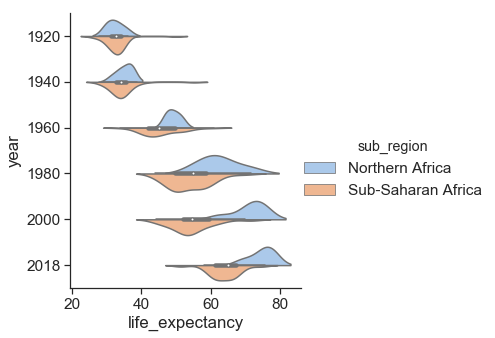

In [67]:
# The split parameter saves some space and looks slick
africa = world_data_1920_2018.loc[world_data_1920_2018['region'] == 'Africa']
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=africa, kind='violin',
            hue='sub_region', palette='pastel', split=True)

For the last challenge,
we will explore how an education indicator between and men and women varies.

In [68]:
world_data.dropna(subset=['years_in_school_women'])['year'].agg(['min', 'max'])

min    1970
max    2015
Name: year, dtype: int64

> #### Challenge
> 1. Subset dataframe for the years 1975, 1995, and 2015
> 1. Make a new column of ratio women men in education
> 2. plot for regions and income groups and times (reword)

## Choosing informative plots for categorical data

In [ ]:
# Setup by loading the data set from the previous lecture
import pandas as pd

# If you have the dataset locally
# world_data = pd.read_csv('../data/world-data-gapminder.csv')
url = 'https://raw.githubusercontent.com/UofTCoders/2018-09-10-utoronto/gh-pages/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)
world_data

When visualizing data it is important to explore different plotting options
and reflect on which one best conveys the information within the data.
In the following code cells,
a sample data set is loaded from the `seaborn` data library
to illustrate advantages and disadvantages among categorical plot types.
This is the same data as was used in the first lecture
and it contains measurements of the sepals and petals among three species of iris flowers.

First let's set the `seaborn` style to something different than last lecture,
and to subset the data to only include observations from 2018.

In [2]:
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='muted', font_scale=1.3)

world_data_2018 = world_data.loc[world_data['year'] == 2018]

A common visualization when comparing a groups,
is to create a barplot of the means of each group
and plot them next to each other.

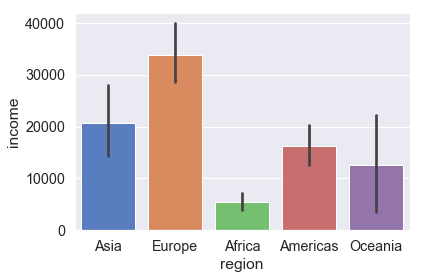

In [3]:
sns.barplot(x='region', y='income', data=world_data_2018)

This barplot shows the mean and the 95% confidence interval.
Since the `seaborn` plotting functions returns a `matplotlib` axes object,
these can be used with any `matplotlib` function.
Let's use this to our advantage to create a single figure
with a comparison between four types of distribution or estimate plots.
By creating a figure with subplots using `subplots()`,
the `seaborn` functions can plot directly into this grid,
instead of creating new figures.
The syntax is slightly different from doing this with native `matplotlib` functions;
the axes to plot into needs to be specified with the `ax` parameter.

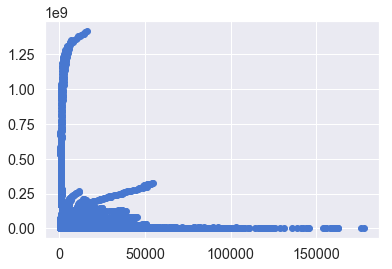

In [54]:
plt.scatter(x='income', y='population',
           label='hey', data=world_data)

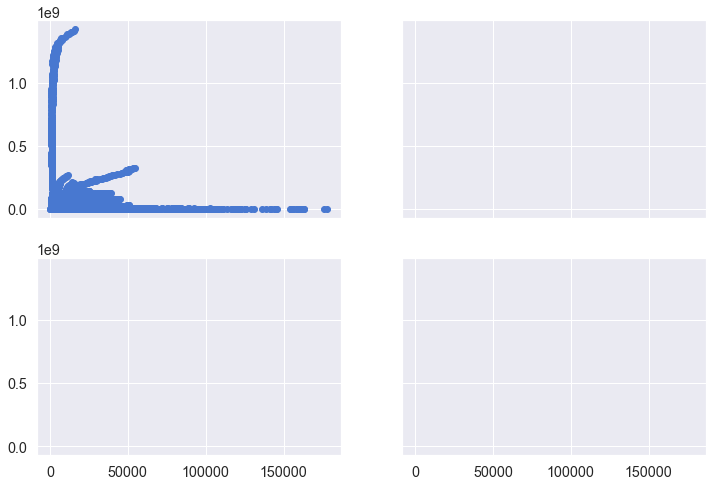

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8),
                                             sharex=True, sharey=True)
ax1.scatter(x='income', y='population',
           label='hey', data=world_data)

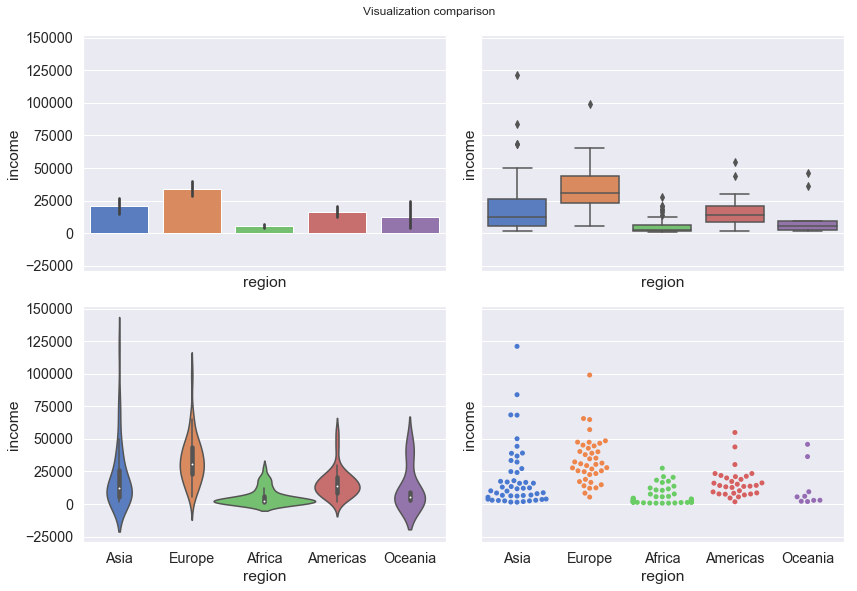

In [49]:
import matplotlib.pyplot as plt


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8),
                                             sharex=True, sharey=True)
fig.suptitle('Visualization comparison', y=1.02) # `y` is used to place the title a little bit higher up

sns.barplot(x='region', y='income', data=world_data_2018, ax=ax1)
sns.boxplot(x='region', y='income', data=world_data_2018, ax=ax2)
sns.violinplot(x='region', y='income', data=world_data_2018, ax=ax3, width=1.4)
sns.swarmplot(x='region', y='income', data=world_data_2018, ax=ax4)

# Remove the axis labels for region and income where it's not needed
# ax1.set_xlabel('')
# ax2.set_xlabel('')
# ax2.set_ylabel('')
# ax3.set_xlabel('')
# ax4.set_xlabel('')
# ax4.set_ylabel('')

fig.tight_layout()

>#### Challenge 3
>
>1. How many data points and/or distribution statistics are displayed in each of these plots?
>2. Out of the these plots,
>   which one do you think is the most informative and why?
>   Which is the most true to the underlying data?

### Pros and cons of different graph types

We will deepen the discussion around some of these ideas,
in the context of the following plot:

![](dynamite-bars.png)

*Reproduced with permission from the poster ["Beware of Dynamite"] by Dr. Tatsuki Koyama*

["Beware of Dynamite"]: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf

It is generally advisable to avoid "decorative" plot elements
that do not convey extra information about the data,
*especially* when such elements hide the real data.
An early champion of this idea was Edward Tufte,
who details how to reduce so called non-data ink and many other things in his book
[The visual display of quantitative information].
In the bar chart above,
the largest visual element are the rectangles,
but their only contained information is where the rectangles end on the y-axis,
the rest of it is unnecessary.
Instead of using the rectangle's height,
a simpler marker
(circle, square, etc)
could have been used to indicate the height on the y-axis.
Note that the body of the rectangle is not representative for where the data lies,
there are probably no data points close to 0,
and several above the rectangle.

[The visual display of quantitative information]: https://www.edwardtufte.com/tufte/books_vdqi

Barplots are especially misleading when used as data summaries,
as in the example above.
In this summary bar plot,
only two distribution parameters are displayed
(the mean and the standard deviation),
instead of showing all the individual data points.
This can be highly misleading,
since diverse distributions can give rise to the same summary plot.
We also have no idea of how many observations there are in each group.
These shortcomings become evident when comparing the barplot
to the underlying distributions that were used to create them:

![](dynamite-vs-dists.png)

*Reproduced with permission from the poster ["Beware of Dynamite"] by Dr. Tatsuki Koyama*

["Beware of Dynamite"]: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/TatsukiKoyama/Poster3.pdf

Immediately,
you can see that many conclusions drawn from the barplot,
such that A and B have the same outcome,
are factually incorrect.
The distribution in D is bimodal,
so representing it with a mean would be like observing black and white birds
and conclude that the average bird color is grey,
it's nonsensical.
If we would have planned our follow up experiments based on the barplot alone,
we would have been setting ourselves up for failure!
Always be sceptical when you see a summary barplot in a published paper,
and think of how the underlying distribution might look.
Note that barplots are more acceptable when used to represents counts,
proportion or percentages,
where there is only one data point per group in the data set
and it is meaningful to start the y-axis from the value zero.

Boxplots and violin plots are more insightful data summaries
as they represent more than just two distribution parameters
(such as mean +/- sd).
However,
these can still be misleading in their own ways
so if the data set is small enough,
it is often the recommended to show each individual observation as individual points.
This could be combined with a superimposed summary plot
or a marker for the mean or median if this additional information is useful.
One exception,
when it is not advisable to show all data points,
is when the data set is large
and plotting each individual observation would saturate the chart.
In that case,
plot summary statistics or a 2D histogram
(more on this later).

Here is an example of how a violinplot can be combined with the individual observations.

In [ ]:
# This is just for the figure size
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(x='region', y='income', data=world_data_2018,
               color='white', inner=None, ax=ax, width=1.4)
sns.swarmplot(x='region', y='income', data=world_data_2018, ax=ax)

ax.set_ylabel('Sepal Length')
ax.set_xlabel('')

Plotting elements have a default order in which they appear.
This can be changed by explicitly via the `zorder` parameter.

Text(0.5,0,'')

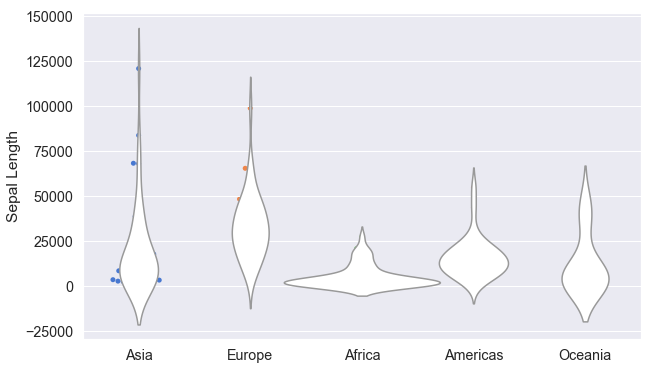

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(x='region', y='income', data=world_data_2018,
               color='white', inner=None, ax=ax, width=1.4)
sns.swarmplot(x='region', y='income', data=world_data_2018,
              ax=ax, zorder=0)

ax.set_ylabel('Sepal Length')
ax.set_xlabel('')

This is not very helpful in this particular case,
but it is good to be aware of the `zorder` parameter if the need arises to combine plots.

>#### Challenge 4
>
>1. Combine a `stripplot()` with a `boxplot()`.
>   Set the `jitter` parameter to distribute the dots,
>   so that they are not all on one line.

## Making plots accessible through suitable color choices

Nearly 10% of the population is colour vision deficient;
red-green colour blindness in particular affects 8% of men and 0.5% of women.
Guidelines for making your visualizations more accessible to those with reduced color vision,
will in many cases also improve the interpretability of your graphs
for people who have standard color vision.
Here are a couple of examples:

Don't use rainbow colormaps such as "jet".

![](heatmap.png)

Color vision deficient viewers will have a understanding this heat map
since some of the colours blend together.

![](colourblind.png)

The jet colormap should be avoided for other reasons,
including that the sharp transitions between colors introduces visual threshold
that do not represent the underlying continuous data.
Another issue is luminance (brightness).
For example,
your eye is drawn to the yellow and cyan regions,
because the luminance is higher.
This can have the unfortunate effect of highlighting features in your data
that don't exist,
misleading your viewers!
Since higher values are not always lighter,
this means that your graph is not going to translate well to greyscale.

More details about jet can be found in [this blog post] and [this series of posts].
In general,
when presenting continuous data,
a perceptually uniform colormap is often the most suitable choice.
This type of colormap ensures that equal steps in data
are perceived as equal steps in color space.
The human brain perceives changes in lightness
to represent changes in the data more accurately
than changes in hue.
Therefore,
colormaps with monotonically increasing lightness throughout the colormap
will be better interpreted by the viewer.
More details and examples of such colormaps are available in the [matplotlib documentation],
and many of the core design principles are outlined in [this entertaining talk].

[this blog post]: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
[this series of posts]: https://mycarta.wordpress.com/2012/05/12/the-rainbow-is-dead-long-live-the-rainbow-part-1/
[matplotlib documentation]: http://matplotlib.org/users/colormaps.html
[this entertaining talk]: https://www.youtube.com/watch?v=xAoljeRJ3lU

The default colormap in matplotlib is `viridis`,
which to have monotonically increasing lightness throughout.
There is also `cividis`,
which is designed to look the same for common color vision deficiencies
as for people without colorblindness.
In addition to careful color choices,
visualization clarity can be improves by using different symbols for the groupings.

In [ ]:
# To see all available palettes,
# set `paletter=''` and view the error message
sns.relplot(x='income', y='pop_density', hue='region', style='region',
            data=world_data_2018, palette='colorblind')

>#### Challenge 5 (optional)
>
>1. Take one of the figures you created previously and upload it to [this website]
>   to view it in a color vision deficiency simulator.

[this website]: http://www.color-blindness.com/coblis-color-blindness-simulator/

## Avoiding saturated plots

Summary plots
(especially bar plots)
were previously mentioned to potentially be misleading,
and it is often most appropriate to show every individual observation
with a dot plot or the like,
perhaps combined with summary markers where appropriate.
But,
what if the data set is too big to visualize every single observation?
In large data sets,
it is often the case that plotting each individual observation
would oversaturate the chart.
Let's see an example of this with a data set containing characteristics of diamonds.

In [8]:
diamonds = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv',
    index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


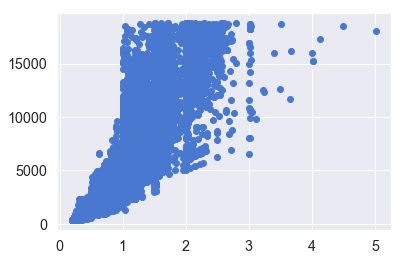

In [9]:
fig, ax = plt.subplots()
ax.scatter('carat', 'price', data=diamonds)

Because this is a dataset with 33,288 observations,
visualizing it in two dimensions creates a graph that is incredibly oversaturated.
Oversaturated graphs make it *far more* difficult to glean information from the visualization.
Maybe adjusting the size of each observation could help?

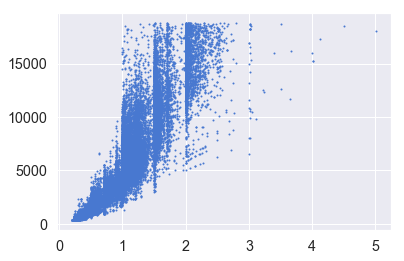

In [10]:
fig, ax = plt.subplots()
ax.scatter('carat', 'price', data=diamonds, s=1)

That's a bit better.
Reducing the transparency might help further.

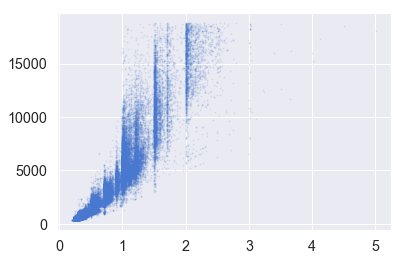

In [11]:
fig, ax = plt.subplots()
ax.scatter('carat', 'price', data=diamonds, s=1, alpha=0.1)

This is clearer than initially,
but does still not reveal the full structure of the underlying data.
A more suitable plot type for this data,
is a so called `hexbin` plot,
which essentially is a two dimensional histogram,
where the color of each hexagonal bin
represents the amount of observations in that bin
(analogous to the height in a one dimensional histogram).

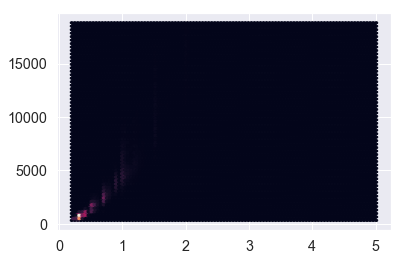

In [12]:
fig, ax = plt.subplots()
ax.hexbin('carat', 'price', data=diamonds)

This looks ugly because the bins with zero observations are still colored.
This can be avoided by setting the minimum count of observations to color a bin.

In [ ]:
fig, ax = plt.subplots()
ax.hexbin('carat', 'price', data=diamonds, mincnt=1)

To know what the different colors represent,
a colorbar needs to be added to this plot.
The space for the colorbar will be taken from a plot in the current figure.

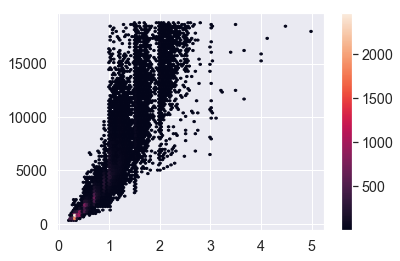

In [14]:
fig, ax = plt.subplots()
# Assign to a variable to reuse with the colorbar
hex_plot = ax.hexbin('carat', 'price', data=diamonds, mincnt=1)
# Create the colorbar from the hexbin plot axis
cax = fig.colorbar(hex_plot)

Notice that the overall figure is the same size,
and the axes that contains the hexbin plot shrank
to make room for the colorbar.
To remind ourselves what is plotted,
axis labels can be added.

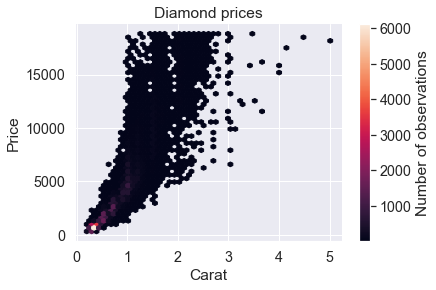

In [15]:
fig, ax = plt.subplots()
hex_plot = ax.hexbin('carat', 'price', data=diamonds, mincnt=1, gridsize=50)
sns.despine()
cax = fig.colorbar(hex_plot)

ax.set_title('Diamond prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
cax.set_label('Number of observations')

It is now clear that the yellow area represents over 2000 observations!

Text(0,0.5,'Price')

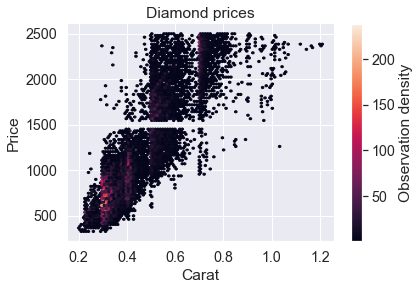

In [16]:
diamonds_subset = diamonds.loc[(diamonds['carat'] < 1.3) & (diamonds['price'] < 2500)]

fig, ax = plt.subplots()
hexbin = ax.hexbin('carat', 'price', data=diamonds_subset, mincnt=1)
sns.despine()
cax = fig.colorbar(hexbin)

cax.set_label('Observation density')
ax.set_title('Diamond prices')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')

Although this hexbin plot is a great way of visualizing the distributions,
it could be valuable to compare it to the histograms for each the plotted variable.

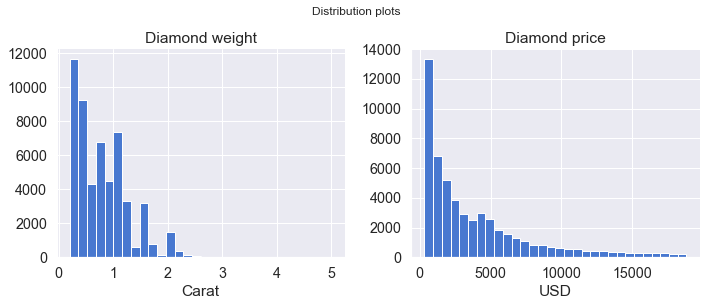

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Distribution plots', y=1.05)
sns.despine()

ax1.hist('carat', bins=30, data=diamonds) 
ax1.set_title('Diamond weight')
ax1.set_xlabel('Carat')

ax2.hist('price', bins=30, data=diamonds) 
ax2.set_title('Diamond price')
ax2.set_xlabel('USD')

fig.tight_layout()

Since visualizing two individual 1D distribution together
with their joint 2D distribution is a common operation,
`seaborn` has a built-in function
to create a hexbin plot with histograms on the marginal axes.

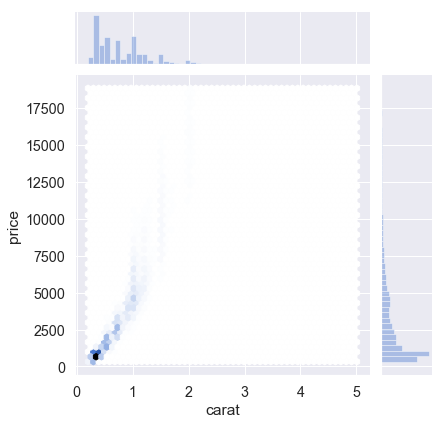

In [18]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='hex')

This can be customized to appear more like the previous hexbin plots.
Since `joinplot()` deals with both the hexbin and the histogram,
the parameter names must be separated,
so that it is clear which plot they are referring to.
This is done by passing them as dictionaries to the `joint_kws` and `marginal_kws` parameters
("kws" stands for "keywords").

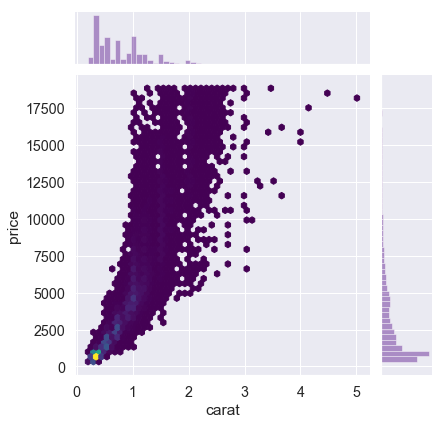

In [19]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='hex',
              joint_kws={'cmap': 'viridis', 'mincnt': 1},
              marginal_kws={'color': 'indigo'})

A KDE/density plot can be made instead of the hexbin.

/home/joel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'mincnt'
  s)


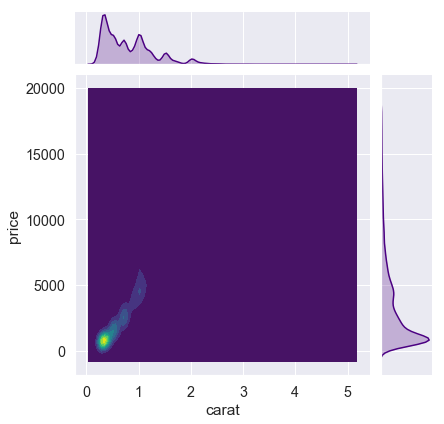

In [20]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='kde',
              joint_kws={'cmap': 'viridis', 'mincnt': 1},
              marginal_kws={'color': 'indigo'})

### More general resources on plotting

- [Ten Simple Rules for Better Figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
- [Finding the Right Color Palettes for Data Visualizations](https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283)
- [Examples of bad graphs](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/)
- [More examples of bad graphs and how to improve them](https://www.stat.auckland.ac.nz/~ihaka/120/Lectures/lecture03.pdf)
- [Wikipedia has a great article on misleading graphs](https://en.wikipedia.org/wiki/Misleading_graph)
- [Usability article about how to design for people with color blindness](http://blog.usabilla.com/how-to-design-for-color-blindness/)